<a href="https://colab.research.google.com/github/AlexeiDmitriev/Avocado/blob/main/Avocado_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado analytics 🥑
https://www.kaggle.com/datasets/neuromusic/avocado-prices/data

## Questions we are about to answer:

1.   Exploratory analisys
2.   Predict prices with....



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 0. Imports and first look

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avocado.csv', index_col='Unnamed: 0', parse_dates=['Date'])

In [ ]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
print(data.Date.min(), '-', data.Date.max())

2015-01-04 00:00:00 - 2018-03-25 00:00:00


In [ ]:
data.dtypes

,0
Date,datetime64[ns]
AveragePrice,float64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64
XLarge Bags,float64


In [ ]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

We will create separate dataframes for TotalUS, regions (Midsouth, SouthCentral, Southeast, West) and subregions to analyse them separately.

In [ ]:
data_us = data.loc[data.region=='TotalUS'].copy()
data_regions = data.loc[data.region.isin(['Midsouth', 'SouthCentral', 'Southeast', 'West'])].copy()
data_subregions = data.loc[~data.region.isin(['TotalUS', 'Midsouth', 'SouthCentral', 'Southeast', 'West'])]

## 1. Let's create some plots for average price and total volume

<Axes: xlabel='Date', ylabel='AveragePrice'>

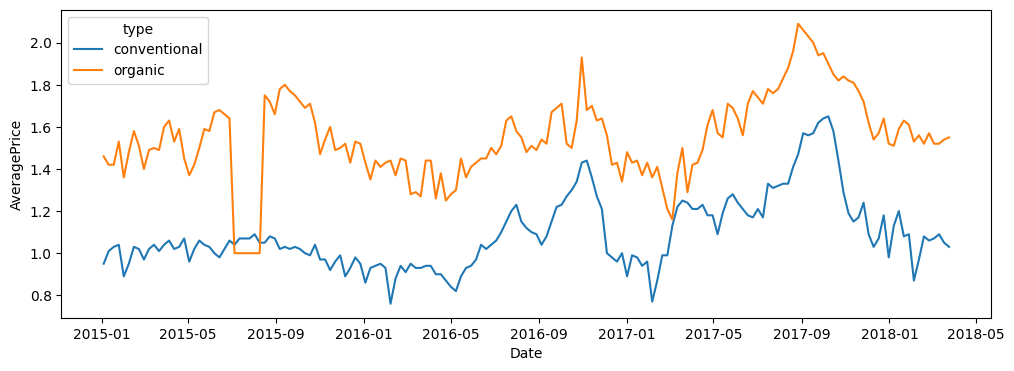

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=data_us, x='Date', y='AveragePrice', hue='type')

<Axes: xlabel='Date', ylabel='AveragePrice'>

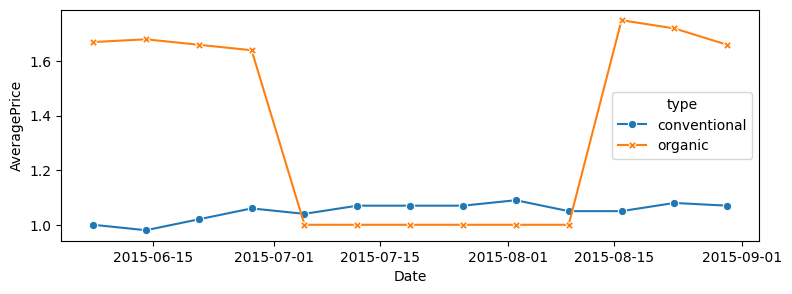

In [ ]:
plt.figure(figsize=(9, 3))
sns.lineplot(data=data_us[(data_us['Date'] > '2015-06-01') & (data_us['Date'] < '2015-09-01')], x='Date', y='AveragePrice', hue='type', markers=True, dashes=False, style="type")

In [ ]:
mask = (data_us['Date'] < '2015-09-01') & (data_us['Date'] > '2015-06-01') & (data_us['type'] == 'organic') & (data_us['AveragePrice'] == 1.00)
data_us.loc[mask, 'AveragePrice'] = np.nan.interpolate()

AttributeError: 'float' object has no attribute 'interpolate'

In [ ]:
mask = (data_us['Date'] < '2015-09-01') & (data_us['Date'] > '2015-06-01') & (data_us['type'] == 'organic') & (data_us['AveragePrice'] == 1.00)
data_us.loc[mask, 'AveragePrice'] = np.nan

In [ ]:
data_us.loc[(data_us['Date'] < '2015-09-01') & (data_us['Date'] > '2015-06-01') & (data_us['type'] == 'organic')]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17,2015-08-30,1.66,670005.94,150924.97,325442.96,5569.76,188068.25,113122.37,74945.88,0.0,organic,2015,TotalUS
18,2015-08-23,1.72,666276.26,176723.74,298092.60,5985.12,185474.80,119991.27,65483.53,0.0,organic,2015,TotalUS
19,2015-08-16,1.75,644689.71,150876.80,310229.77,6215.26,177367.88,107593.62,69774.26,0.0,organic,2015,TotalUS
20,2015-08-09,NaN,625259.00,170184.00,269330.00,6905.00,178838.00,126058.00,52779.00,0.0,organic,2015,TotalUS
21,2015-08-02,NaN,573873.00,164126.00,263359.00,5115.00,141271.00,93120.00,48151.00,0.0,organic,2015,TotalUS
22,2015-07-26,NaN,580826.00,169940.00,266249.00,4391.00,140244.00,71807.00,68436.00,0.0,organic,2015,TotalUS
23,2015-07-19,NaN,650389.00,159752.00,317728.00,4758.00,168149.00,81667.00,86482.00,0.0,organic,2015,TotalUS
24,2015-07-12,NaN,608845.00,178871.00,267353.00,5093.00,157526.00,80220.00,77305.00,0.0,organic,2015,TotalUS
25,2015-07-05,NaN,668233.00,205073.00,304597.00,6251.00,152309.00,88261.00,64048.00,0.0,organic,2015,TotalUS
26,2015-06-28,1.64,659947.03,192182.13,332739.27,5956.87,129068.76,80006.40,49062.36,0.0,organic,2015,TotalUS


<Axes: xlabel='Date', ylabel='Total Volume'>

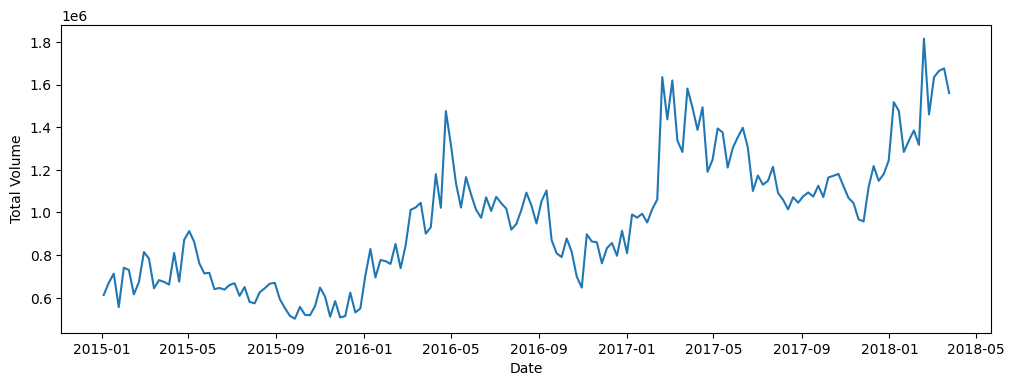

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=data_us.loc[data_us.type == 'organic'], x='Date', y='Total Volume')

<Axes: xlabel='Date', ylabel='Total Volume'>

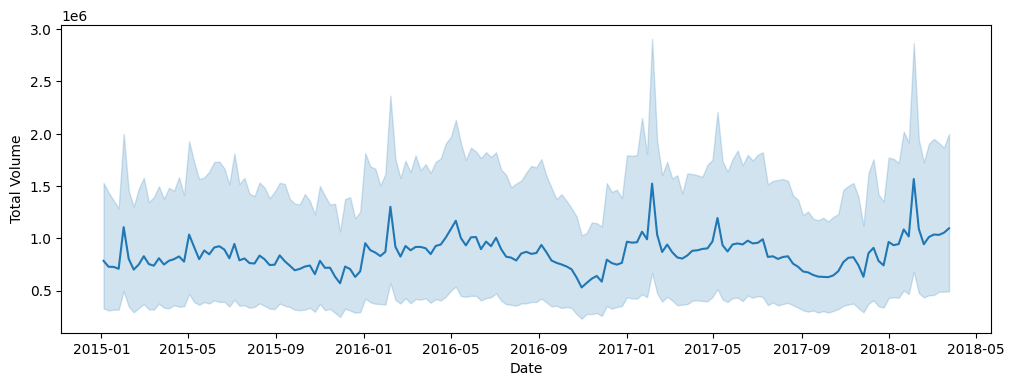

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=data, x='Date', y='Total Volume')

In [ ]:
data['Q-YEAR'] = data['Date'].dt.to_period('Q')
data['M-YEAR'] = data['Date'].dt.to_period('M')
data['W-YEAR'] = data['Date'].dt.to_period('W')

<Axes: xlabel='avg_price', ylabel='total_volume'>

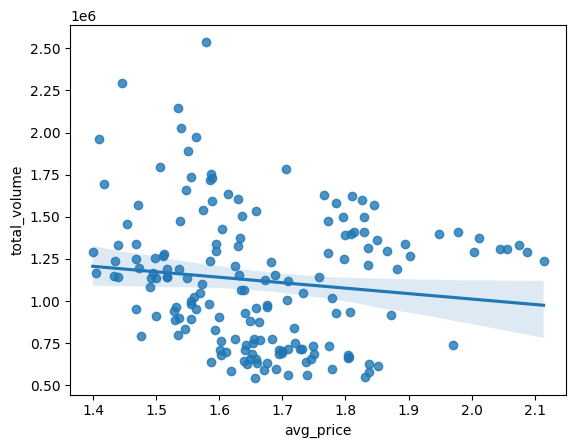

In [ ]:
sns.regplot(data=data.loc[data.type=='organic'].groupby(['Date', 'type'], as_index=False).agg(avg_price=('AveragePrice', 'mean'), total_volume=('Total Volume', 'sum')), x='avg_price', y='total_volume')

<Axes: xlabel='avg_price', ylabel='total_volume'>

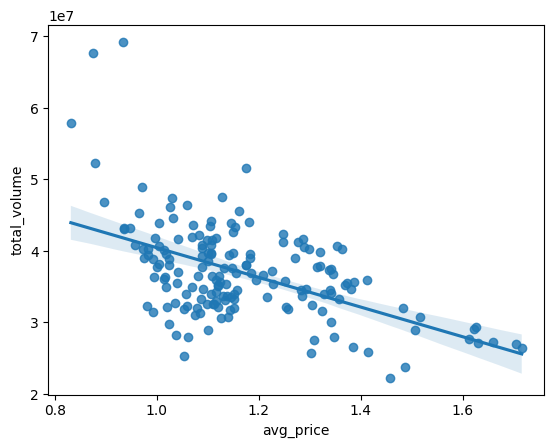

In [ ]:
sns.regplot(data=data.loc[data.type=='conventional'].groupby(['W-YEAR', 'type'], as_index=False).agg(avg_price=('AveragePrice', 'mean'), total_volume=('Total Volume', 'sum')), x='avg_price', y='total_volume')

<Axes: xlabel='Date', ylabel='AveragePrice'>

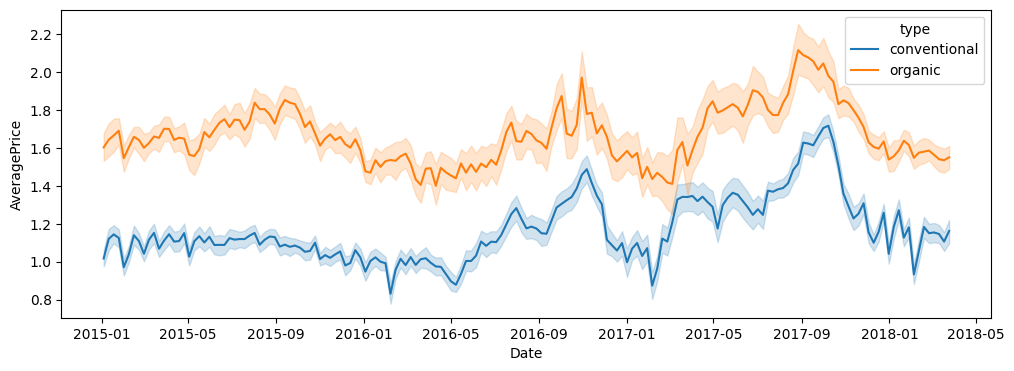

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=data, x='Date', y='AveragePrice', hue='type')

<Axes: xlabel='Date', ylabel='Total Volume'>

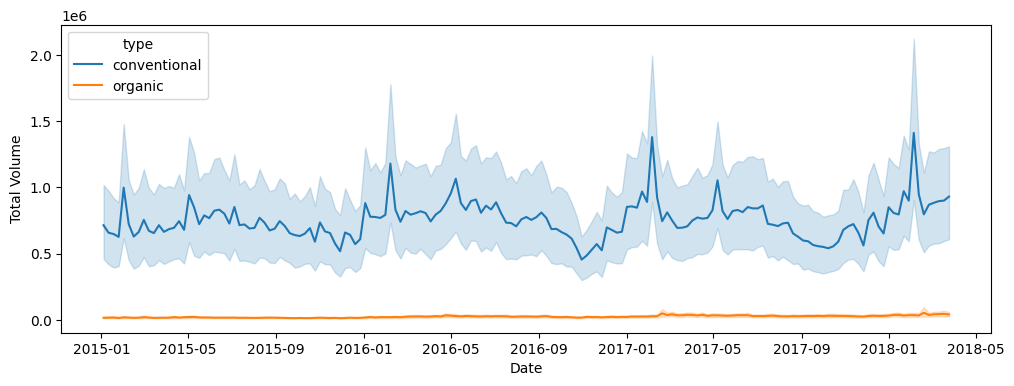

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=data, x='Date', y='Total Volume', hue='type')

<Axes: xlabel='Date', ylabel='Total Volume'>

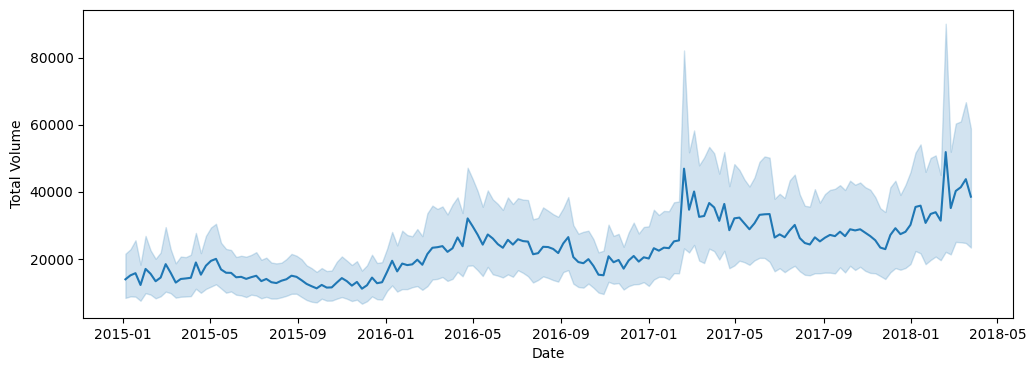

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=data.loc[data.type=='organic'], x='Date', y='Total Volume')

<Axes: xlabel='Date', ylabel='Total Volume'>

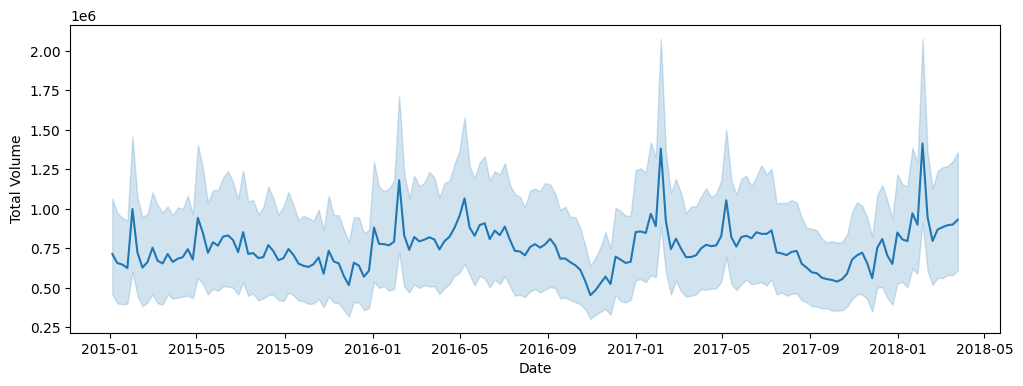

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=data.loc[data.type=='conventional'], x='Date', y='Total Volume')

In [ ]:
data.groupby('region').agg(total_volume=('Total Volume', 'sum')).sort_values(by='total_volume', ascending=False).head(10)

,total_volume
region,
California,1.028982e+09
Northeast,7.132809e+08
GreatLakes,5.896425e+08
LosAngeles,5.078965e+08
Plains,3.111885e+08
NewYork,2.407341e+08
DallasFtWorth,2.084193e+08
Houston,2.031679e+08
PhoenixTucson,1.956433e+08
